# Assignment 2

## Objective of this assignment
The objective of this assignment is to get an understanding of the many ways data can be visualized. Upon completing this exercise you should be familiar with histograms, boxplots and scatter plots.


## ** Important: ** When handing in your homework:
+ Hand in the notebook **and nothing else** named as follows: StudentName1_snumber_StudentName2_snumber.ipynb
+ **From this week on, we will deduct a point if you zip/tar/archive the notebook, especially if you include the data folder!** 
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Brightspace.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ Use the Brightspace discussion board or email the student assistants for questions on how to complete the exercises.
+ If you find mistakes/have suggestions/would like to complain about the assigment material itself, please email me [Lisa] at `l.tostrams@science.ru.nl`


## Advised Reading and Exercise Material
**The following reading material is recommended:**

- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, *Introduction to Data Mining*, section 3.3
- Jonathon Shlens, *A tutorial on Principal Component Analysis* , https://arxiv.org/abs/1404.1100


## 2.1 Visualizing wine data (4.5 points)

In this part of the exercise we will consider two data sets related to red and white variants of the Portuguese "Vinho Verde" wine[1]. The data has been downloaded from http://archive.ics.uci.edu/ml/datasets/Wine+Quality. Only physicochemical and sensory attributes are available, i.e., there is no data about grape types, wine brand, wine selling price, etc. The data has the following attributes:

| #   |  Attribute      | Unit |
| --- |:--------------- |:---- |
| 1   | Fixed acidity (tartaric) | g/dm3 |
| 2   | Volatile acidity (acetic) | g/dm3 |
| 3   | Citric acid | g/dm3 |
| 4   | Residual sugar | g/dm3 |
| 5   | Chlorides | g/dm3 |
| 6   | Free sulfur dioxide | mg/dm3 |
| 7   | Total sulfur dioxide | mg/dm3 |
| 8   | Density | g/cm3 |
| 9   | pH | pH |
| 10  | Sulphates | g/dm3 |
| 11  | Alcohol | % vol. |
| 12  | Quality score | 0-10 |

Attributes 1-11 are based on physicochemical tests and attribute 12 on human judging. The data set has many observations that can be considered outliers and in order to carry out analyses it is important to remove the corrupt observations.

The aim of this exercise is to use visualization to identify outliers and remove these outliers from the data. It might be necessary to remove some outliers before other outlying observations become visible. Thus, the process of finding and removing outliers is often iterative. The wine data is stored in a MATLAB file, `Data/wine.mat`

*This exercise is based upon material kindly provided by the Cognitive System Section, DTU Compute,
http://cogsys.compute.dtu.dk. Any sale or commercial distribution is strictly forbidden.*

> 2.1.1a) (3pts)
1. Load the data into Python using the `scipy.io.loadmat()` function. 
2. This data set contains many observations that can be considered outliers. Plot a box plot and a histogram for each attribute to visualize the outliers in the data set. Use subplotting to nicely visualize these plots.
3. From prior knowledge we expect volatile acidity to be around 0-2 g/dm3, density to be close to 1 g/cm3, and alcohol percentage to be somewhere between 5-20% vol. We can safely identify the outliers for these attributes, searching for the values, which are a factor of 10 greater than the largest we expect. Identify outliers for volatile acidity, density and alcohol percentage, and remove them from the data set. This means that you should remove the entire sample from the dataset, not just for that attribute!
4. Plot new box plots and histograms for these attributes and compare them with initial ones.

> 
 + *You can use the `scipy.stats.zscore()` to standardize your data before you plot a boxplot.*
 + *You can use logical indexing to easily make a new dataset (for example $X\_filtered$, where the outliers are removed. This is much easier, and faster than methods like dropping, or selecting using a for loop or list comprehension. For more information, see: https://docs.scipy.org/doc/numpy-1.13.0/user/basics.indexing.html Take a look at the -Boolean or "mask" index arrays- section.*
 + *You can use the function `matplotlib.pyplot.subplots()` to plot several plots in one figure. A simple example an be found at: https://matplotlib.org/2.0.2/examples/pylab_examples/subplots_demo.html, take a look at the 2D subplot specifically. There is also an example of a subplot in the first assignment. If you're handy, you can devise a for loop which fills up the subplot area!* 
 + *The object in wine.mat is a dictionary. The attributes are stored in matrix $X$. Attribute names and class names are stored in the attributeNames object, which contain arrays, of which the first element contains the names*

**Make sure to take a look at the documentation of functions before you try and use them!**


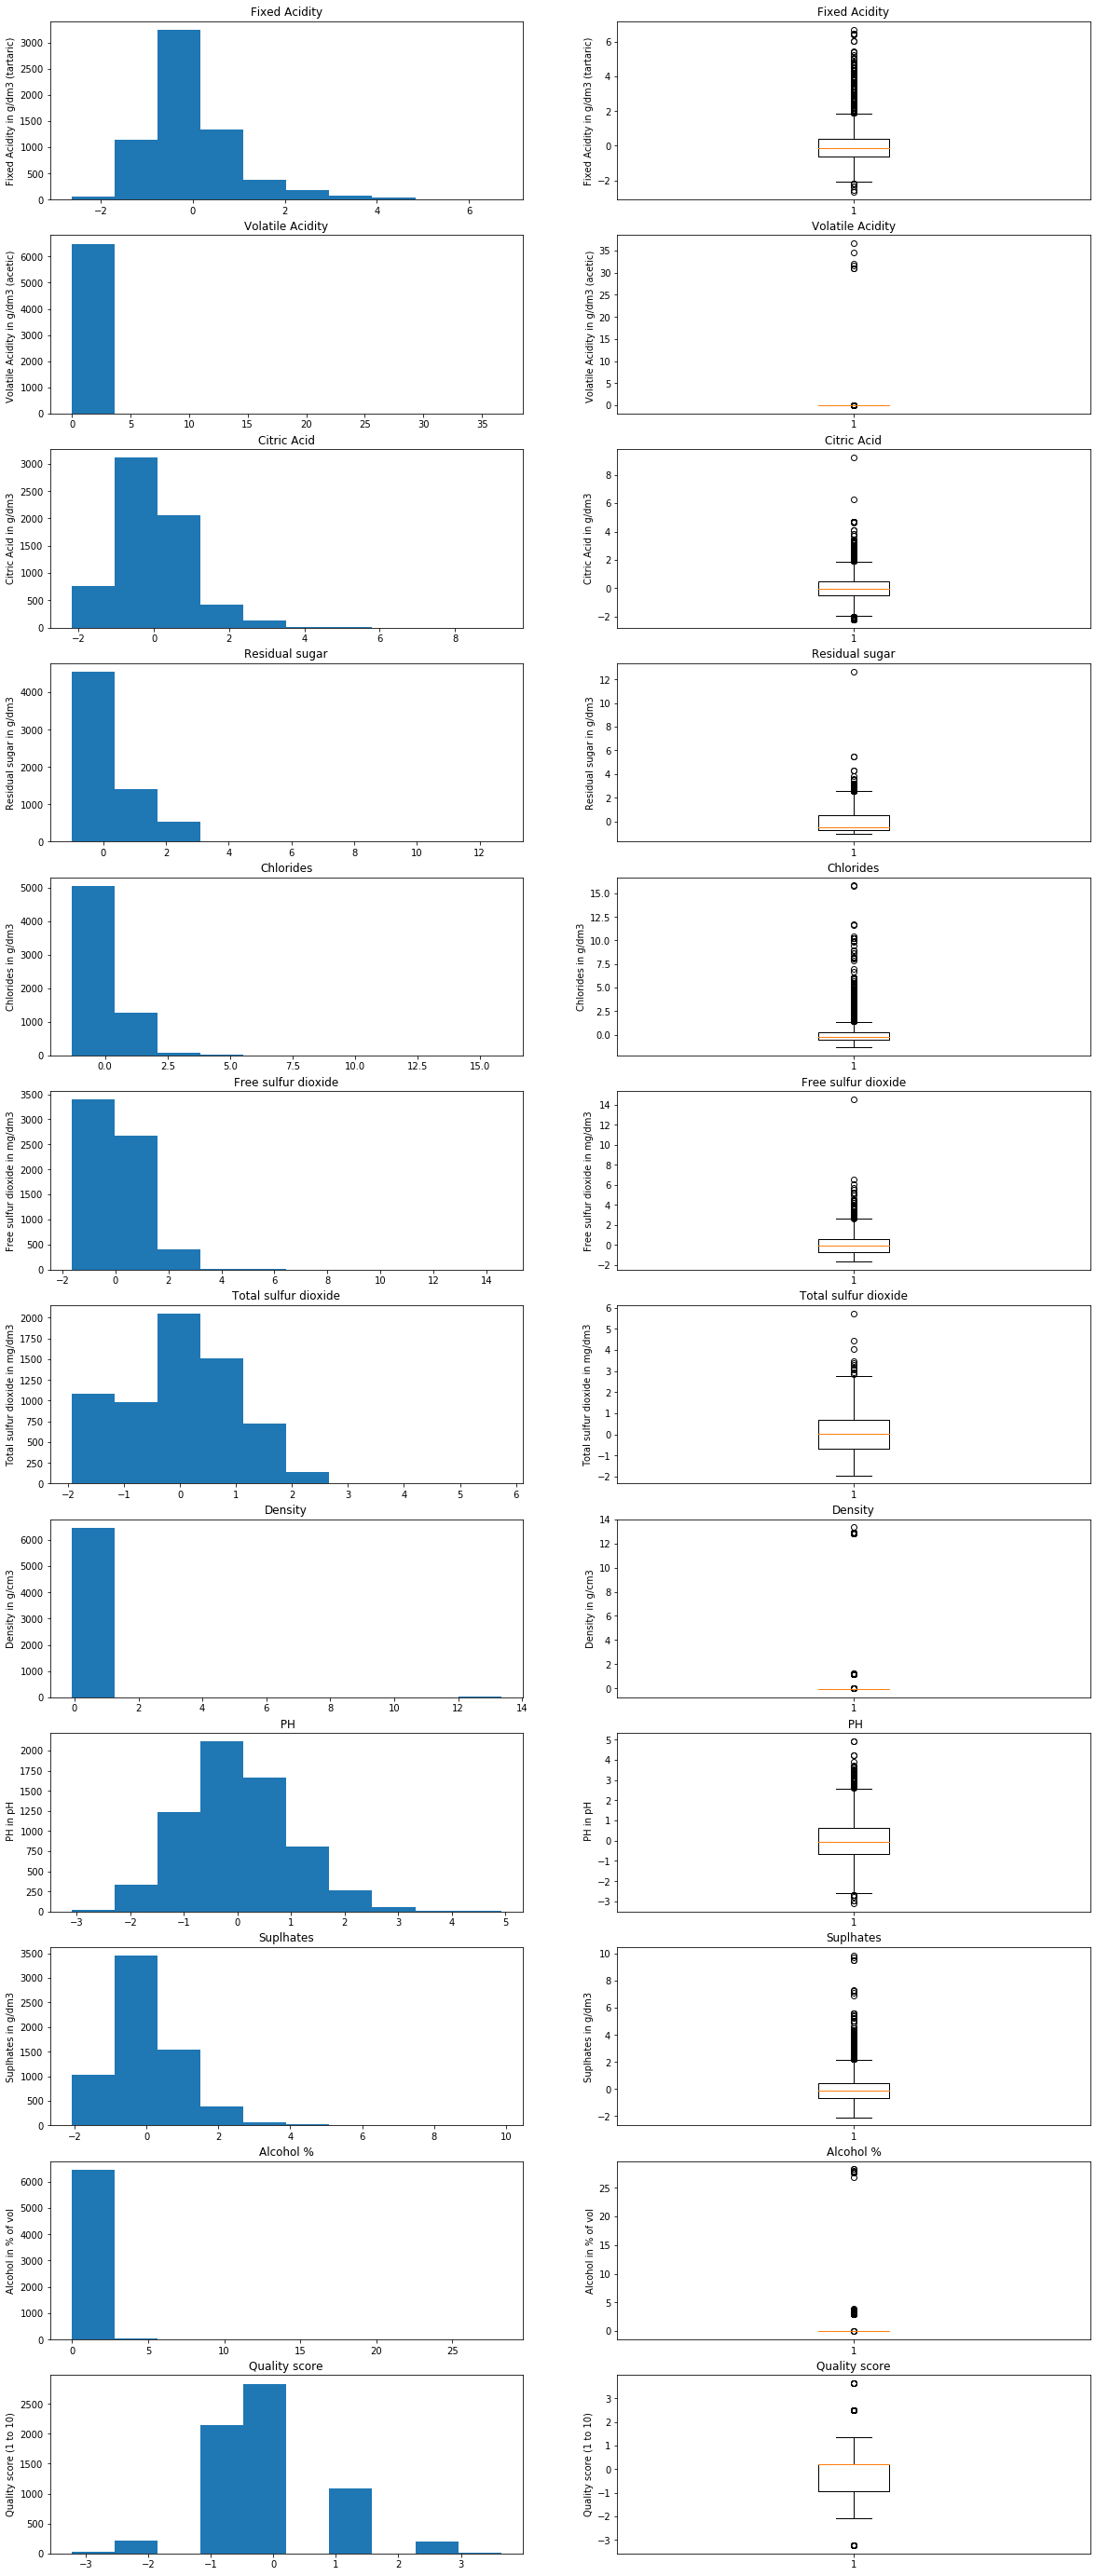

Figure 1: Here is an gathering of plots that plot out the values of different wine attributes


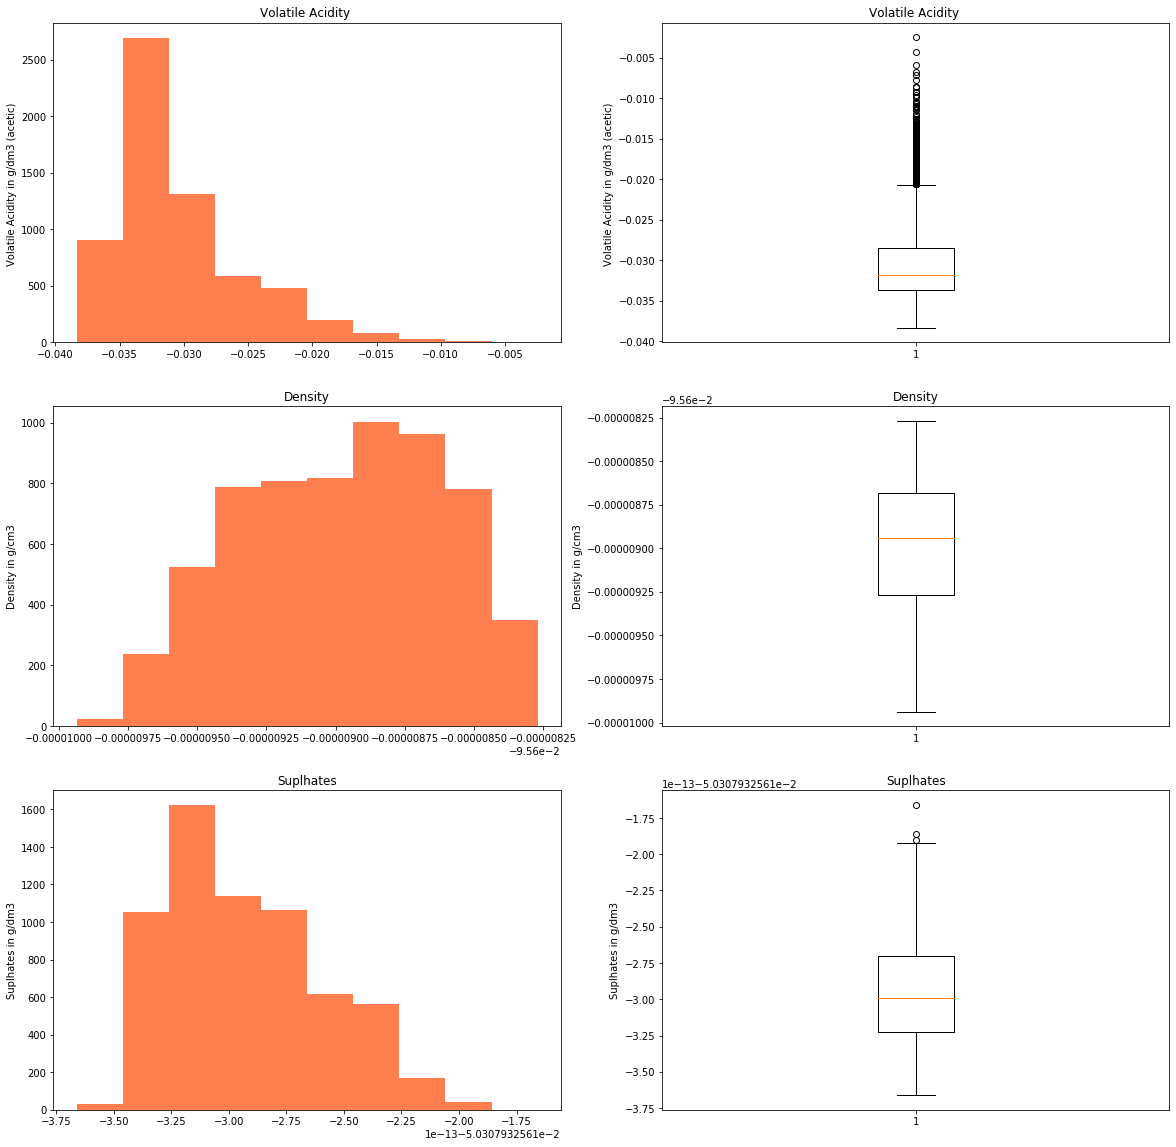

Figure 2: Here is an gathering of plots, plotting three attributes, that plot out a datacollection of which the outliers are removed


In [69]:
import scipy.io
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
wine= scipy.io.loadmat('Data/wine.mat')
theValues= wine.get("X")
theStanValues= scipy.stats.zscore(theValues)

data12=[[],[],[],[],[],[],[],[],[],[],[],[]]

for k in theStanValues:
    data12[0].append(k[0])
    data12[1].append(k[1])
    data12[2].append(k[2])
    data12[3].append(k[3])
    data12[4].append(k[4])
    data12[5].append(k[5])
    data12[6].append(k[6])
    data12[7].append(k[7])
    data12[8].append(k[8])
    data12[9].append(k[9])
    data12[10].append(k[10])
    data12[11].append(k[11])

f, histo = plt.subplots(12,2,figsize=(20,50))
row=0
cti =0

atna= ['Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Residual sugar',
       'Chlorides', 'Free sulfur dioxide', 'Total sulfur dioxide','Density', ' PH',
       'Suplhates', 'Alcohol %', 'Quality score']

atnay= ['Fixed Acidity in g/dm3 (tartaric)', 'Volatile Acidity in g/dm3 (acetic) ', 'Citric Acid in g/dm3', 'Residual sugar in g/dm3',
       'Chlorides in g/dm3', 'Free sulfur dioxide in mg/dm3', 'Total sulfur dioxide in mg/dm3','Density in g/cm3', ' PH in pH',
       'Suplhates in g/dm3', 'Alcohol in % of vol', 'Quality score (1 to 10)']
    

for at in data12:
    histo[row,0].hist(at)
    histo[row,1].boxplot(at)
    histo[row,0].set_title(atna[cti]) 
    histo[row,1].set_title(atna[cti]) 
    histo[row,0].set_ylabel(atnay[cti])
    histo[row,1].set_ylabel(atnay[cti])
    row=row+1
    cti+=1
plt.show()
print('Figure 1: Here is an gathering of plots that plot out the values of different wine attributes')


cleanedStanValues= theStanValues
cleanedStanValues2=cleanedStanValues[np.where(cleanedStanValues[:,1]<=0)]
cleanedStanValues8=cleanedStanValues2[np.where(cleanedStanValues2[:,7]<=0)]
cleanedStanValues11=cleanedStanValues8[np.where(cleanedStanValues8[:,10]<=0)]



atnacl= ['Volatile Acidity ','Density', 
       'Suplhates']

atn = ['Volatile Acidity in g/dm3 (acetic) ','Density in g/cm3', 
       'Suplhates in g/dm3']


data1710 = [[],[],[]]
for k in cleanedStanValues11:
    data1710[0].append(k[1])
    data1710[1].append(k[7])
    data1710[2].append(k[10])
f, histo2 = plt.subplots(3,2,figsize=(20,20))
row2=0
ct=0
for at in data1710:
    histo2[row2,0].hist(at, color='coral')
    histo2[row2,1].boxplot(at)
    histo2[row2,0].set_title(atnacl[ct]) 
    histo2[row2,1].set_title(atnacl[ct]) 
    histo2[row2,0].set_ylabel(atn[ct])
    histo2[row2,1].set_ylabel(atn[ct])
    row2+=1
    ct+=1
plt.show()
print('Figure 2: Here is an gathering of plots, plotting three attributes, that plot out a datacollection of which the outliers are removed')


    
    


----
Comparison between de plots of the cleaned datasets of Alchol, Density and Volatile Acidity in comparison to the plots made with the standarized version of the original data: 

In all of the three cases, by removing the outliers from the dataset and plotting the data again, the scale of the plots decreases which makes it possible to distinguish datapoints that are so close to oneother that in the big scale plot they seem to merge into another. This makes it easier to detect a relationship because the distribution of the datapoints is better mapped out without the extremes altering the means and modes and plots. 

----

> 2.1.1b (0.5pts)
Why do we need to standardize the data after removing the outliers? Give the -statistical- reason, not just the practical reason. 



----
Disregarded.

----

> 2.1.2 (1pt) Make scatter plots between attributes and wine quality as rated by human judges. Can you manually identify any clear relationship between the attributes of the wine and wine quality? Which values of these attributes are associated with high quality wine? Use the correlation coefficients to substantiate your answers. Make sure to use the data where the outliers are removed 
+ *You can calculate the correlation coefficient using the `scipy.stats.pearsonr()` function to measure the strength of association.*

Fixed Acidity with Quality score : The Pearson correlation coefficient is: (-0.07674320790961987, 5.874849265067289e-10) is the two tailed p-value 

Volatile Acidity with Quality score : The Pearson correlation coefficient is: (-0.054250826856885634, 1.2131414199342662e-05) is the two tailed p-value 

Citric Acid with Quality score : The Pearson correlation coefficient is: (0.08553171718367848, 5.001763955846583e-12) is the two tailed p-value 

Residual sugar with Quality score : The Pearson correlation coefficient is: (-0.036980484585769434, 0.002871024584300511) is the two tailed p-value 

Chlorides with Quality score : The Pearson correlation coefficient is: (-0.200665500435102, 5.316452331006692e-60) is the two tailed p-value 

Free sulfur dioxide with Quality score : The Pearson correlation coefficient is: (0.05546305861663267, 7.70844450273021e-06) is the two tailed p-value 

Total sulfur dioxide with Quality score : The Pearson correlation coefficient is: (-0.04138545385560881, 

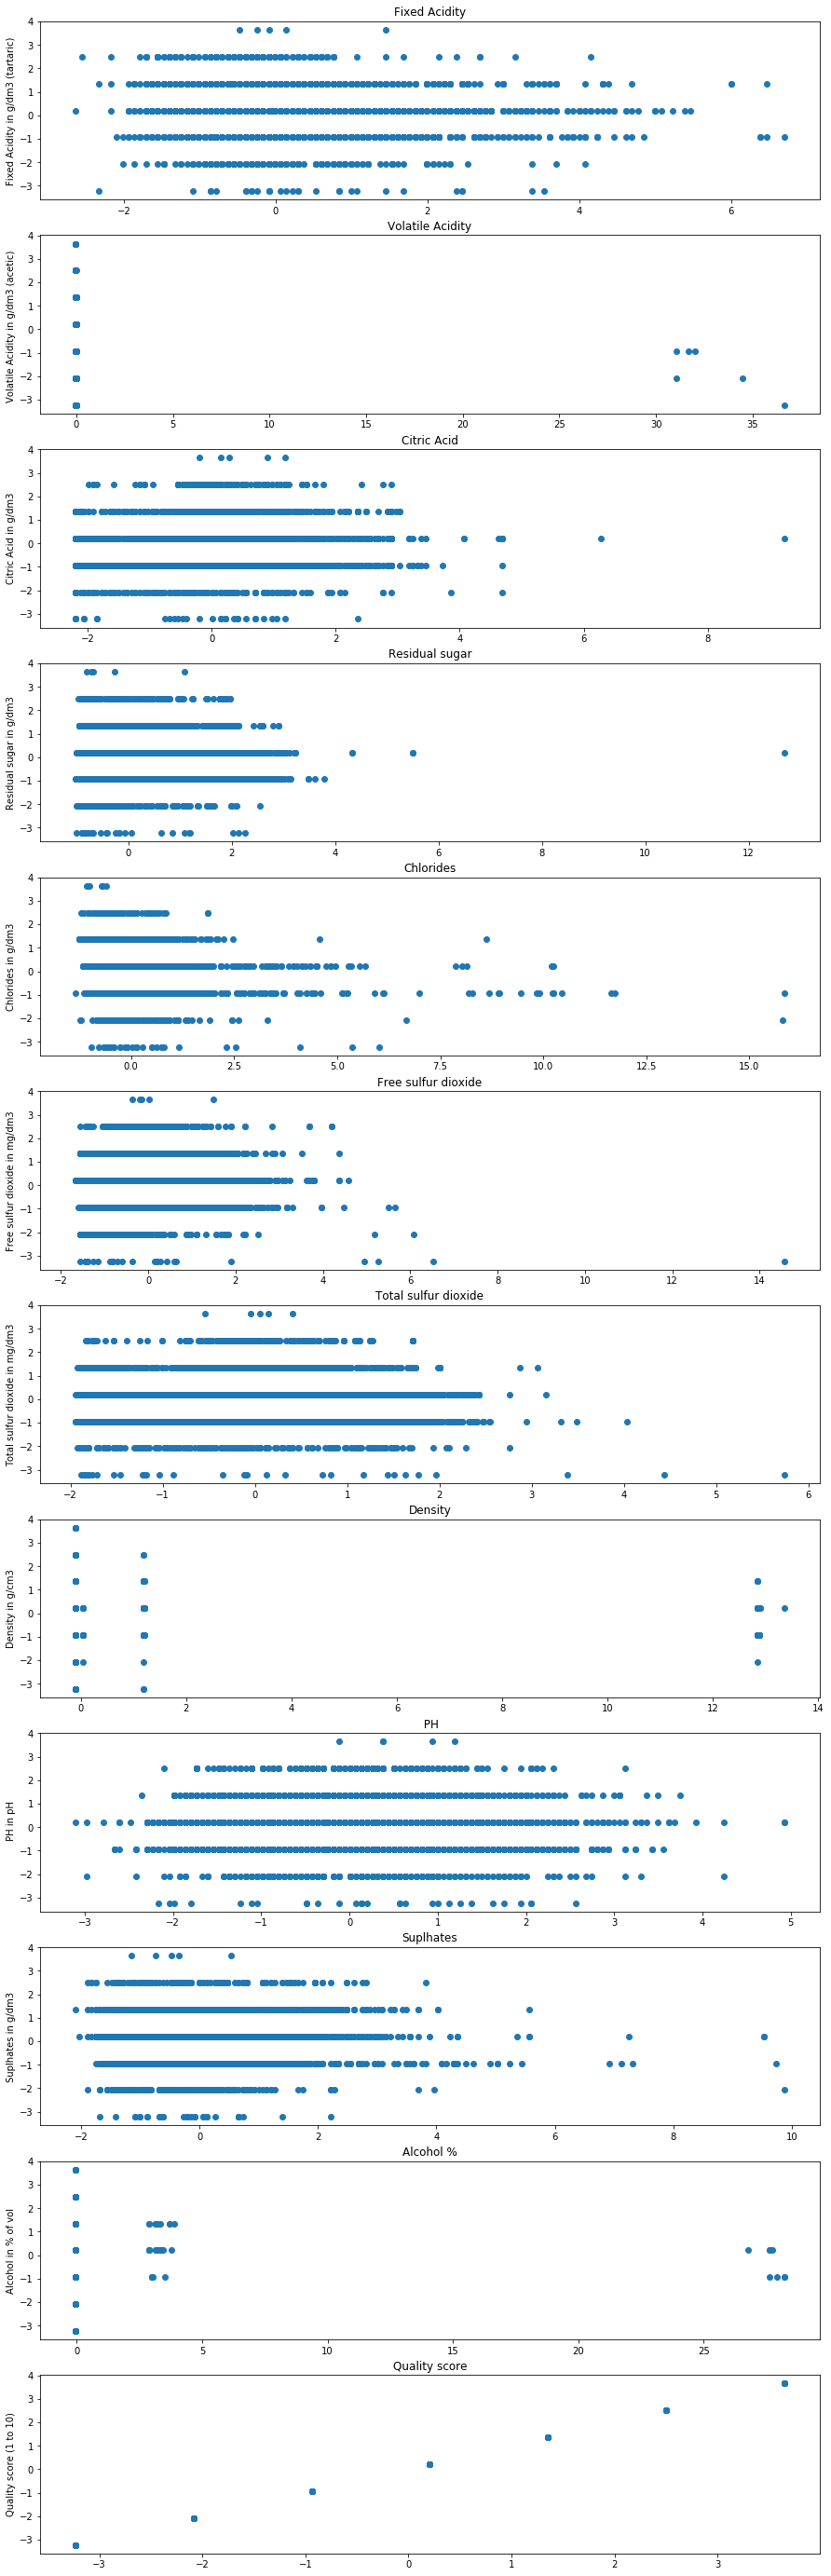

Figure 3: Portrayed are all the wine attributes plotted against the Quality score


In [70]:
f, vino = plt.subplots(12, figsize=(15,50))
row=0

ct=0
for at in data12:
    vino[row].scatter(at, data12[11])
    vino[row].set_title(atna[ct]) 
    vino[row].set_ylabel(atnay[ct])
    print(atna[ct],'with',atna[11],': The Pearson correlation coefficient is:',scipy.stats.pearsonr(at, data12[11]), 'is the two tailed p-value','\n')
    ct+=1
    row+=1
plt.show()
print('Figure 3: Portrayed are all the wine attributes plotted against the Quality score')




----
Note: We don't have enough knowledge of the data to remove the outliers of all the attributes, so we used the standarized data for plotting.

Answer: 
plotting the attributes against the quality score with the standardized data does not give a clear relationship that can be identified. However, the correlation coefficients do tell more about the strength of the correlation. If the pearsons R is above 0.3 or below -0.3, which is never the case, the correlation is strong enough to think of it as a clear relationship. The second number in the tuple, the p value, shows the significancy of the relationship.  
We can see that Chlorides have the strongest relationship, which is a small one for the value of pearsons R is between 0.1 and 0.3, with the winequality, although it is a negative one which means the more chlorides, the lower the wine is graded on quality. This relationship is significant for the P value is lower that 0.05.


----

## 2.2 Visualizing the handwritten digits (4 points)

In this part of the exercise we will analyse the famous *mnist* handwritten digit dataset from: http://yann.lecun.com/exdb/mnist/.

> 2.2.1 (4pts)
1. Load zipdata.mat by using the loadmat function. There are two data sets containing handwritten digits: *testdata* and *traindata*. Here, we will only use *traindata*. The first column in the matrix *traindata* contains the digit (class) and the last 256 columns contain the pixel values.
2. Create the data matrix *X* and the class index vector *y* from the data. Remove
the digits with the class index 2-9 from the data, so only digits belonging to
the class 0 and 1 are analyzed. (remember logical indexing!) 
3. Visualize the first 10 digits as images. (take a look at the example code)
Next, compute the principal components (PCA) of the data matrix. Now, using the PCA model, create a new data matrix $Z$ by projecting $X$ onto the space spanned by the loadings $V$. The new data matrix should have 4 attributes corresponding to PC1-PC4.  Use subplotting to show the digits and their reconstructed counterparts in an orderly manner.
4. Reconstruct the initial data using PC1-PC4 into a new matrix called $W$. Visualize the first 10 digits as images for the reconstructed data and compare them with images for the original data.
5. Make a 4-by-4 subplot of scatter plots of each possible combination projection onto PC1 to PC4 (contained in $Z$) against each other. You can leave the diagonal blank.  Plot elements belonging to different classes in different colors. Add a legend to clarify which digit is shown in which color.
6. Make a 3-dimensional scatter plot of the projections onto the first three principal components PC1-PC3 (contained in $Z$). Plot elements belonging to different classes in different colors. Add a legend to clarify which digit is shown in which color.
7. What can you conclude from the various scatterplots about the PCs and the way they separate the data?

> **Hints:**
+ *The below example code can help you visualize digits as images.*
+ *See Assignment 1 if you can not recall how to compute a PCA.*
+ *Keep in mind that numpy.linalg.svd() returns the transposed **V<sup>T</sup>** matrix as output.*
+ *You can use **Z** = **Y** $*$ **V**[:,:4] to project the data onto the first four PCs. Don't forget that the $*$ operator does not perform matrix multiplication for numpy arrays!*
+ *To reconstruct the data from projection you can use the following formula: **W** = **Z**&ast;**V**[:,:4]<sup>T</sup> + **μ**. *
+ *You can take a look at the example_figure.ipynb notebook to see how you can easily plot multiple classes and color them correspondingly.* 
+ *It is advisable to make a for-loop to generate the 2D scatter plots, this saves a lot of time. It is an important skill to master if you want to easily modify your work later on, for example when correcting mistakes, or when you want to modify each plot in the same manner.* 


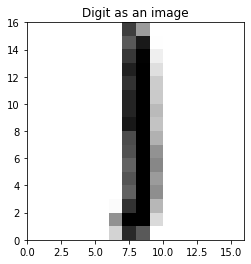

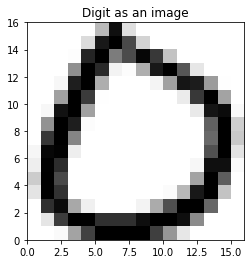

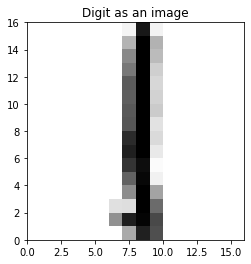

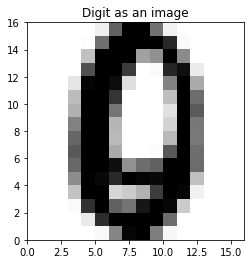

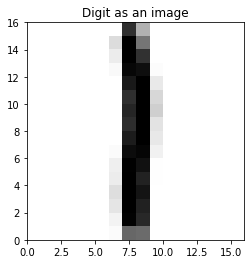

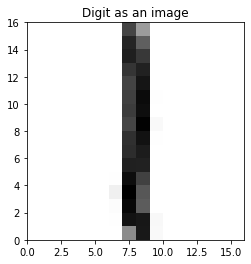

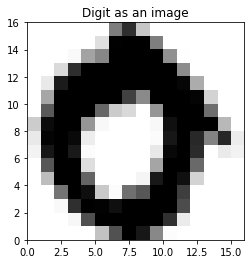

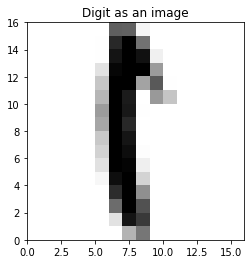

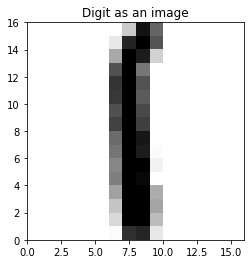

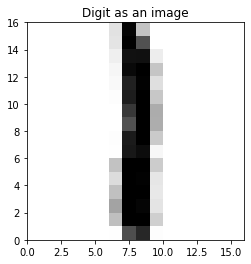

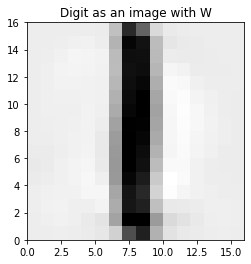

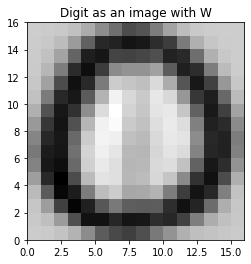

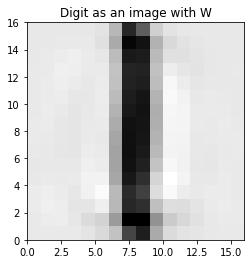

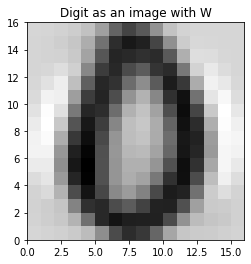

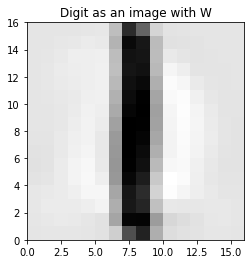

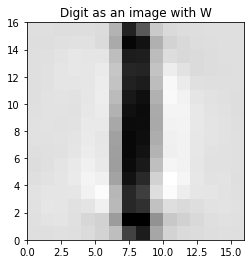

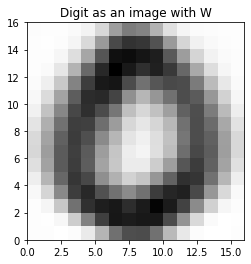

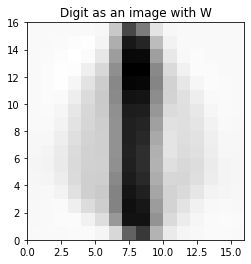

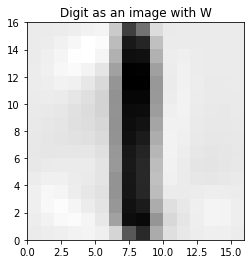

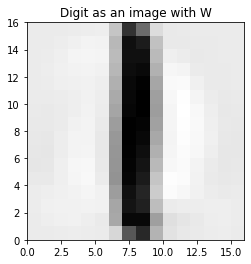

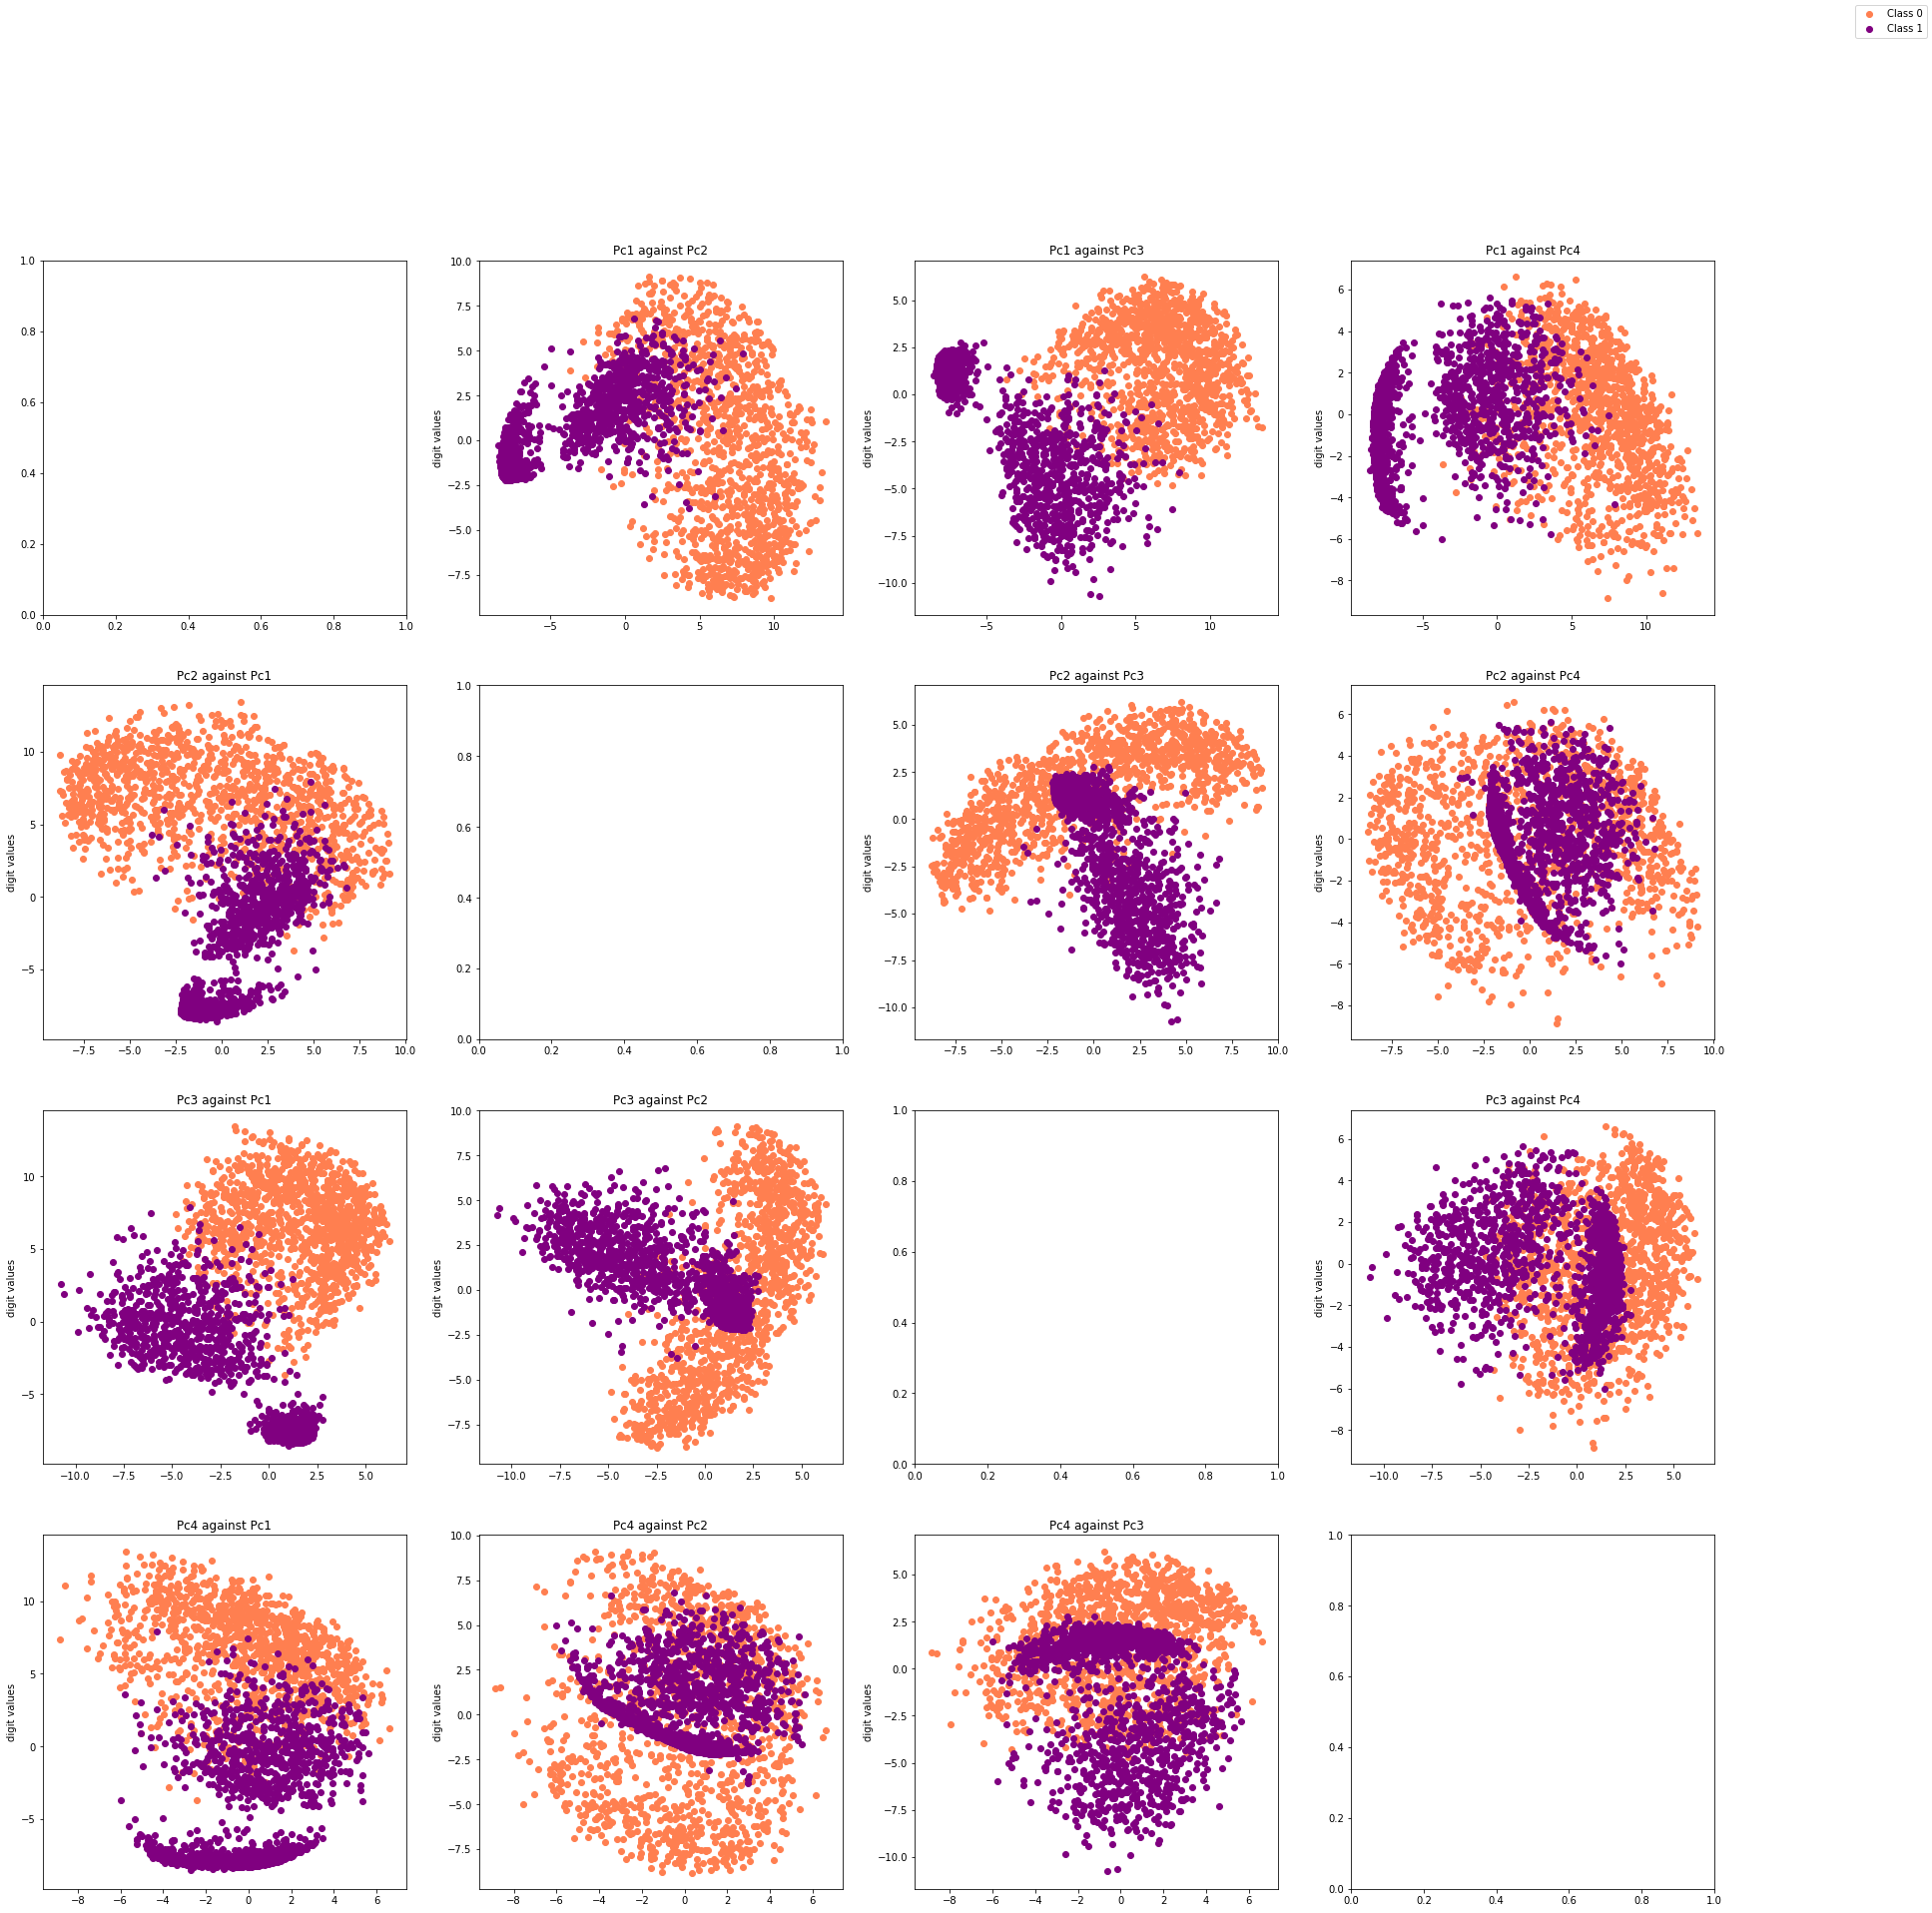

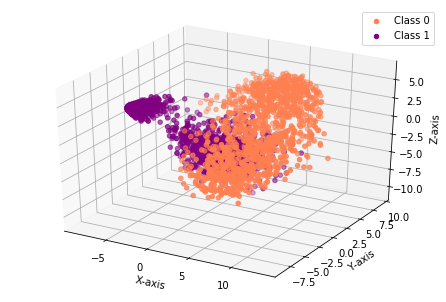

In [59]:

## Example code:
#------------------------------------------------
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.io import loadmat
from numpy import reshape
from mpl_toolkits.mplot3d import Axes3D
# Index of the digit to display
i = 0

# Load Matlab data file to python dict structure
mat_data = loadmat('./Data/zipdata.mat')

# Extract variables of interest
testdata = mat_data['testdata']
traindata = mat_data['traindata']
X = traindata[:,1:]
y = traindata[:,0]

# Visualize the i'th digit as an image
#plt.subplot(1,1,1);
#I = reshape(X[i,:],(16,16))
#plt.imshow(I, extent=(0,16,0,16), cmap=cm.gray_r);
#plt.title('Digit as an image');
#plt.show()
#------------------------------------------------

X=np.array(traindata)
Y=[]
for k in X:
    Y.append(k[0])
i=-1
nrs=[]
for nr in Y:
    i=i+1
    if nr>2.0:
        nrs.append(i)
newX=np.delete(X,nrs,0)
n=0
while n<10:   
    plt.subplot(1,1,1)
    I = reshape(newX[n,1:],(16,16))
    plt.imshow(I, extent=(0,16,0,16), cmap=cm.gray_r);
    plt.title('Digit as an image');
    plt.show()
    n=n+1
n=0
u=newX.mean(axis=0) #calculate the mean

#Center the data

Xc=newX-u 
U,S,Vt=np.linalg.svd(Xc)

V=Vt.T
pc1=np.dot(Xc,V[:,0])
pc2=np.dot(Xc,V[:,1])
pc3=np.dot(Xc,V[:,2])
pc4=np.dot(Xc,V[:,3])
Z = Xc.dot(V[:,:4])


W= Z.dot(V[:,:4].T)+u
while n<10:   
    plt.subplot(1,1,1)
    I = reshape(W[n,1:],(16,16))
    plt.imshow(I, extent=(0,16,0,16), cmap=cm.gray_r);
    plt.title('Digit as an image with W');
    plt.show()
    n=n+1
    
#   Now, using the PCA model, create a new data matrix  𝑍  by projecting  𝑋 onto the space spanned by the loadings  𝑉 . 
#   The new data matrix should have 4 attributes corresponding to PC1-PC4. Use subplotting to show the digits and their 
#   reconstructed counterparts in an orderly manner.
# ANSWER: Lars (TA) said that the question is unclear but that we should just plot all the values against the values in pc1.
#So this is when you plot every row and plot the pc1 in the same figure, this look wrong and takes a long time but we also do not know what else to plot against eachother:
#We commented it because it takes a long time to show the plots
#f2, pro = plt.subplots(2,2,figsize=(15,15))
#for row in Xc:
#    pro[0,0].plot(row)
#    pro[0,1].plot(row)
#    pro[1,0].plot(row)
#    pro[1,1].plot(row)
#pro[0,0].plot(pc1)
#pro[0,0].plot(pc2)
#pro[0,0].plot(pc3)
#pro[0,0].plot(pc4)



indexlist0 = []
indexlist1 = []
indexnr=0
for index in newX:    
    if index[0]==0:
        indexlist0.append(indexnr)
    else:
        indexlist1.append(indexnr)
    indexnr=indexnr+1

f, com = plt.subplots(4,4,figsize=(30,30))
pc10=[]
pc11=[]
pc20=[]
pc21=[]
pc30=[]
pc31=[]
pc40=[]
pc41=[]
for k in indexlist0:
    pc10.append(pc1[k])
    pc20.append(pc2[k])
    pc30.append(pc3[k])
    pc40.append(pc4[k])
for k in indexlist1:
    pc11.append(pc1[k])
    pc21.append(pc2[k])
    pc31.append(pc3[k])
    pc41.append(pc4[k])

com[0,1].scatter(pc10,pc20, color='coral')
com[0,1].scatter(pc11,pc21, color='purple')
com[0,1].set_title('Pc1 against Pc2')
com[0,1].set_ylabel('digit values')
com[0,2].scatter(pc10,pc30, color='coral')
com[0,2].scatter(pc11,pc31, color ='purple')
com[0,2].set_title('Pc1 against Pc3')
com[0,2].set_ylabel('digit values')
com[0,3].scatter(pc10,pc40, color='coral')
com[0,3].scatter(pc11,pc41, color ='purple')
com[0,3].set_title('Pc1 against Pc4')
com[0,3].set_ylabel('digit values')
com[1,0].scatter(pc20,pc10,color='coral')
com[1,0].scatter(pc21,pc11, color='purple')
com[1,0].set_title('Pc2 against Pc1')
com[1,0].set_ylabel('digit values')
com[1,2].scatter(pc20, pc30, color='coral')
com[1,2].scatter(pc21, pc31, color='purple')
com[1,2].set_title('Pc2 against Pc3')
com[1,2].set_ylabel('digit values')
com[1,3].scatter(pc20, pc40, color='coral')
com[1,3].scatter(pc21, pc41, color='purple')
com[1,3].set_title('Pc2 against Pc4')
com[1,3].set_ylabel('digit values')
com[2,0].scatter(pc30, pc10,color='coral')
com[2,0].scatter(pc31, pc11,color='purple')
com[2,0].set_title('Pc3 against Pc1')
com[2,0].set_ylabel('digit values')
com[2,1].scatter(pc30, pc20,color='coral')
com[2,1].scatter(pc31, pc21,color='purple')
com[2,1].set_title('Pc3 against Pc2')
com[2,1].set_ylabel('digit values')
com[2,3].scatter(pc30, pc40,color='coral')
com[2,3].scatter(pc31, pc41,color='purple')
com[2,3].set_title('Pc3 against Pc4')
com[2,3].set_ylabel('digit values')
com[3,0].scatter(pc40, pc10,color='coral')
com[3,0].scatter(pc41, pc11,color='purple')
com[3,0].set_title('Pc4 against Pc1')
com[3,0].set_ylabel('digit values')
com[3,1].scatter(pc40, pc20,color='coral')
com[3,1].scatter(pc41, pc21,color='purple')
com[3,1].set_title('Pc4 against Pc2')
com[3,1].set_ylabel('digit values')
com[3,2].scatter(pc40, pc30,color='coral')
com[3,2].scatter(pc41, pc31,color='purple')
com[3,2].set_title('Pc4 against Pc3')
com[3,2].set_ylabel('digit values')
f.legend(['Class 0','Class 1'])

plt.show()
print('Figure 4: A collection of plots that represent different PCs against oneanother and shows them next to eachother so differences are immediately visible')

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(pc10, pc20, pc30, color='coral')
ax.scatter(pc11, pc21, pc31, color='purple')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.legend(['Class 0','Class 1'])
plt.show()
print('Figure 5: a 3d portrayal of PC1, PC2 and PC3 and the different classes plotted in one figure')
#



The image look the same looking at the shapes but the greyvalues are darker of W






## 2.3 Probability and Statistics (1.5 points)
The aim of this exercise is to learn how to calculate basic statistics in python.
> 2.3.1 (0.3pts) A study of a very limited population of Aliens reveals the following number of body appendages (limbs):
<center>2,3,6,8,11,18</center>
i. Find the mean $m$ and the standard deviation $\sigma$ of this population.
+ *You can use the methods numpy.ndarray.mean() and numpy.ndarray.std() to calculate the mean and standard deviation.*

In [16]:
import numpy as np
data=np.array([2,3,6,8,11,18])
m=np.ndarray.mean(data)
σ=np.ndarray.std(data) 
print(m)
print(σ)



8.0
5.385164807134504


> ii. (0.3pts) List all possible samples of two aliens without replacement, and find each mean. Do the same with samples of four aliens.
+ *You can use the method itertools.combinations(v,n) to find all possible samples of a vector v taking n elements at a time.*

In [28]:
import itertools
from itertools import combinations
summeank2 = 0 
count = 0

summeank4 = 0 
countk4 = 0


k2=combinations(data,2)
print("This is for pairs of 2")
for l in k2:
    print(l)
    f,g = l
    summeank2 = summeank2+(f+g)/2
    count+=1

print('The total mean of the K3 samples is:', summeank2/count,'\n')


print("This is for pairs of 4")
k4=combinations(data,4)
for l in k4:
    print(l)
    f,g,h,j = l
    summeank4 = summeank4 + (f+g+h+j)/4
    countk4 +=1
    
    
print('The total mean of the K4 samples is:', summeank4/countk4,'\n')






This is for pairs of 2
(2, 3)
(2, 6)
(2, 8)
(2, 11)
(2, 18)
(3, 6)
(3, 8)
(3, 11)
(3, 18)
(6, 8)
(6, 11)
(6, 18)
(8, 11)
(8, 18)
(11, 18)
The total mean of the K3 samples is: 8.0 

This is for pairs of 4
(2, 3, 6, 8)
(2, 3, 6, 11)
(2, 3, 6, 18)
(2, 3, 8, 11)
(2, 3, 8, 18)
(2, 3, 11, 18)
(2, 6, 8, 11)
(2, 6, 8, 18)
(2, 6, 11, 18)
(2, 8, 11, 18)
(3, 6, 8, 11)
(3, 6, 8, 18)
(3, 6, 11, 18)
(3, 8, 11, 18)
(6, 8, 11, 18)
The total mean of the K4 samples is: 8.0 



> iii. (0.3pts) Each of the means above is called a sample mean. Find the mean of all the sample means (denoted by $m_x$) and the standard
deviation of all the sample means (denoted by $\sigma_x$) for both
the *N=2* and *N=4* samples.

In [34]:
import math
k2=combinations(data,2)
k4=combinations(data,4)
allMeans2=[]
allMeans4=[]
sumM4=0
sumM2=0
count=0
print("mean and sd for 2:")
for p in k2:
    f,g=p
    me2=((f+g)/2)
    allMeans2.append(me2)
    print('mean: ',round(me2,2))
    p2=np.asarray(p)
    print('sd: ',round(np.ndarray.std(p2),2),'\n')
    sumM2=sumM2+(me2-m)*(me2-m)
sd2=math.sqrt(sumM2)

print("mean and sd for 4:")
for p in k4:
    f,g,h,j=p
    me4=((f+g+h+j)/4)
    allMeans4.append(me4)
    print('mean: ',round(me4,2))
    p2=np.asarray(p)
    print('sd: ', round(np.ndarray.std(p2),2),'\n')
    sumM4=sumM4+(me4-m)*(me4-m)
sd4=math.sqrt(sumM4/3)

print('standard devation of 2 is', round(sd2,2),' and sd of 4 equals ', round(sd4,2)) 
print(round(𝜎/math.sqrt(2),2), ' population standard deviation  for N=2')
print(round(𝜎/math.sqrt(4),2), ' population standard deviation for N=4')
    

mean and sd for 2:
mean:  2.5
sd:  0.5 

mean:  4.0
sd:  2.0 

mean:  5.0
sd:  3.0 

mean:  6.5
sd:  4.5 

mean:  10.0
sd:  8.0 

mean:  4.5
sd:  1.5 

mean:  5.5
sd:  2.5 

mean:  7.0
sd:  4.0 

mean:  10.5
sd:  7.5 

mean:  7.0
sd:  1.0 

mean:  8.5
sd:  2.5 

mean:  12.0
sd:  6.0 

mean:  9.5
sd:  1.5 

mean:  13.0
sd:  5.0 

mean:  14.5
sd:  3.5 

mean and sd for 4:
mean:  4.75
sd:  2.38 

mean:  5.5
sd:  3.5 

mean:  7.25
sd:  6.38 

mean:  6.0
sd:  3.67 

mean:  7.75
sd:  6.34 

mean:  8.5
sd:  6.5 

mean:  6.75
sd:  3.27 

mean:  8.5
sd:  5.89 

mean:  9.25
sd:  5.97 

mean:  9.75
sd:  5.76 

mean:  7.0
sd:  2.92 

mean:  8.75
sd:  5.63 

mean:  9.5
sd:  5.68 

mean:  10.0
sd:  5.43 

mean:  10.75
sd:  4.55 

standard devation of 2 is 13.19  and sd of 4 equals  3.81
3.81  population standard deviation  for N=2
2.69  population standard deviation for N=4


> iv. Verify the Central Limit Theorem: (i) (0.1pts) compare the population
mean with the mean of both sample means; (ii) (0.2pts) compare the population
standard deviation divided by the square root of the sample size
with the standard deviation of both sample means (i.e., does
$\sigma_x \approx \sigma/\sqrt{N}$). BTW, a better approximation for
small population sizes is $\sigma_x = \sigma / \sqrt{N} \times
\sqrt{(M-N)/(M-1)}$ with *M = 6* the size of the original



----
(i): Both the population mean and the mean of both sample means are equal, namely 8.0. 
(ii): As seen above, the population standard deviation of N2 is the same as the sd of N$ in the sample. The sample devation of N2 and N2 population differ a lot, N4 sample and population sd differ too but not that much. The central limit theorem says: the sampling distribution of the sample means approaches a normal distribution as the sample size gets larger. Which you can see by not only the means but also the SD that is closer to the population SD when the sample size is bigger.


----

> v. (0.3pts) Plot the distribution of the population and the distributions of both sample means using histograms. What happens to the shape of the sample means distribution as the sample size (N*) increases?

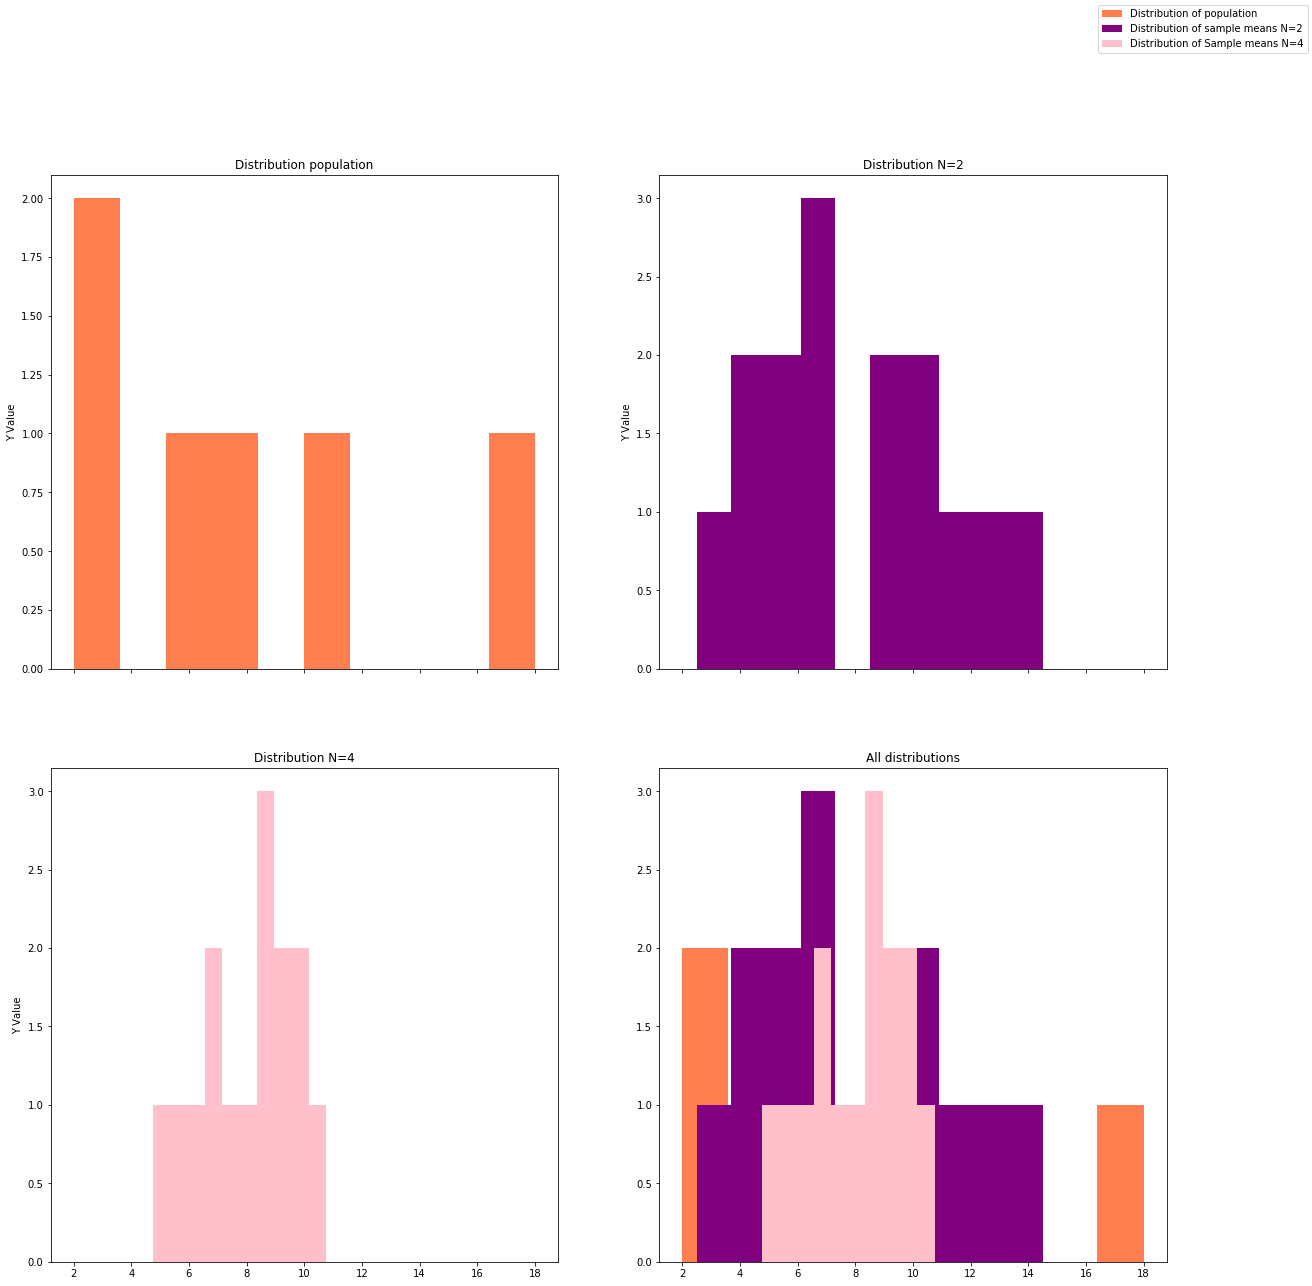

Figure 6. Here you see the distributions of different sample sizes and the population next to eachother in 1 figure. The fourth plot is a plot containing all the plots so they can be compared to eachother on the same axis


In [73]:
f3, lk = plt.subplots(2,2,figsize=(20,20),sharex=True)
lk[0,0].hist(data, color = 'coral')
lk[0,1].hist(allMeans2, color = 'purple')
lk[1,0].hist(allMeans4, color = 'pink')
lk[1,1].hist(data, color = 'coral')
lk[1,1].hist(allMeans2, color = 'purple')
lk[1,1].hist(allMeans4, color = 'pink')
lk[0,0].set_title('Distribution population')
lk[0,1].set_title('Distribution N=2')
lk[1,0].set_title('Distribution N=4')
lk[0,0].set_ylabel('Y Value')
lk[0,1].set_ylabel('Y Value')
lk[1,0].set_ylabel('Y Value')
lk[1,1].set_title('All distributions')
f3.legend(['Distribution of population','Distribution of sample means N=2', 'Distribution of Sample means N=4'])
plt.show()
print('Figure 6. Here you see the distributions of different sample sizes and the population next to eachother in 1 figure. The fourth plot is a plot containing all the plots so they can be compared to eachother on the same axis')


----
When the sample size increases as seen by the third plot, the distribution of datapoints is beter visible and more normally distributed. 

----